# 卷积神经网络应用

### 图像特征学习
- 卷积运算对图像的大小的影响
    - 经过卷积运算图像变小：
        - 原图像大小：$S$
        - 卷积核大小：$K$
        - 目标图像大小：$D = S - K + 1$
- 假设想目标图像大小=原图像
    - 对原图像补边：padding = $\dfrac{K-1}{2}$
    
- 图像降维：
    - 池化运算：pool
        - 均值
        - 最大池化：（推荐）
    - 负像素：
        - 过滤（负的像素值设置为0）
        - 激活函数activity function。
- 图像特征：
    - 变化的部分才是图像特征
    
    - 像素的变化（像素的梯度）
        - 斑点
        - 边界
        - 角点
    - 数学原型：
        - 微分/求导
        - 一阶导数： Sobel梯度
        - 二阶导数： Laplace梯度
    - 一个图像进行求导运算，得到梯度特征图
        - 怎么对图像求导 

# torch卷积函数

## 卷积运算函数

- 主要使用2D卷积做图像处理，所以下面只讲解下2D卷积。



### 函数说明

```python
    torch.nn.functional.conv2d(
        input,             # 被处理2D矩阵
        weight,           # 2D卷积核（共享权重）
        bias=None,     # 2D偏置项
        stride=1,         # 卷积运算的步长，可以是一个整数（表示高宽使用相同的步长）或者元组（表示高宽使用不同的步长）。
        padding=0,     # 补边长度（这个需要手工计算传入） 
        dilation=1,       # dilation卷积核的间隔，可以一个整数（表示两个方向一样），或者元组（表示两个方向）
        groups=1) → Tensor
```


- 核心参数格式说明：
    - input：四维张量Tensor，维度说明(批量数，深度，高度，宽度)
    - weight：四维张量Tensor，维度说明（输出数， 深度，高度，宽度）
        - 如果指定groups，则深度分成组计算，则是个维度为（输出数， 深度/groups，高度，宽度）
    -  bias：卷积运算的偏置项，一维张量，维度为（输出数）

In [3]:
import numpy as np

import torch
n = [
    [
    
    [
    [1,2,3],
    [4,5,6],
    [7,8,9]
    ]
]
]

a = np.array(n)
print(a.shape)
m = [[[
    [2,2],[2,2]
]]]
# 卷积核  权重
b = np.array(m)
print(b.shape)

a = torch.Tensor(a)
b = torch.Tensor(b)
bias = torch.Tensor(np.array([0]))

c = torch.nn.functional.conv2d(input=a, weight=b, bias=bias,padding=0)
print(c)
1 2   2 2   2 4
4 5   2 2   8 10

(1, 1, 3, 3)
(1, 1, 2, 2)
tensor([[[[24., 32.],
          [48., 56.]]]])


In [14]:
import cv2
import torch
img = cv2.imread("img.jpg")
# h w
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

t = torch.Tensor(img)
# 1 1 h w
t = torch.Tensor(t).view(1, 1, t.shape[0],t.shape[1])

print("N C H W")
print(t.shape)

#定义一个卷积函数：  卷积核为（1个输出，8深度，（3*3））
c1 = torch.nn.Conv2d(1,8,(3,3))

a = c1(t)
print(a.shape)




# c2 = torch.nn.Conv2d(8,16,(3,3))
# a = c2(a)
# print(a.shape)
# c3 = torch.nn.Conv2d(16,1,(3,3))
# a = c3(a)
# print(a.shape)

N C H W
torch.Size([1, 1, 456, 367])
torch.Size([1, 8, 454, 365])


## 池化运算函数

- 池化运算主要是降维，这是用于卷积神经网络的运算。
- 池化运算一般有两种方式：
    - 平均池化
    - 最大池化
- 池化的核的大小决定了降维的多少：
    - 2 * 2 的池化核：输出是输入的一半。


### 函数说明

1. 平均池化函数

```python 
    torch.nn.functional.avg_pool2d(input, kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None) → Tensor
```

- 重要参数说明：
    - input：(minibatch,in_channels,iH,iW)与卷积的输入是一致的；
    - kernel_size：池化核大小（不需要数据）：使用整数或者元组；
    - padding：补边大小（补边用于池化的cell够用）；
    - count_include_pad : 计算平均的时候，是否考虑padding的0；
    - ceil_mode：当计算输出形状的时候，采用取最大（ceil）还是最小（floor）；
    

2. 最大池化函数

```python
    torch.nn.functional.max_pool2d(*args, **kwargs)
```

- 说明：
    - 与平均池化一样，差异就是运算方式不同：
        - 平均池化：取平均数作为输出
        - 最大池化：取最大值作为输出

### 卷积神经网络LeNet-5实现
LetNet是一种入门级的神经网络模型，是一个简单的卷积神经网络，可以用来做手写体识别。
- 实现LeNet-5卷积神经网络，并实现手写数字识别。
    - 数据集采用手写数字数据集。
    
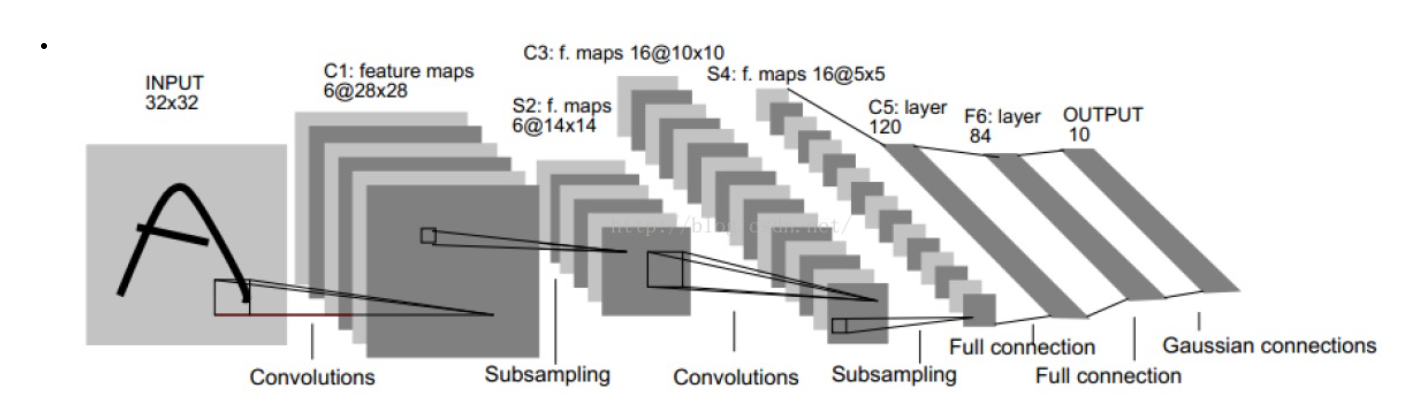

convolutions卷积
subsampling 抽样
- 输入图像：INPUT：`N*32*32*1`
    - N是图像数量
    - 1是图像深度
    - `32*32`是图像高宽（有的数据集图像高宽是`28*28`,这个可以在卷积运算的时候，指定Padding即可）
- 池化层：C1：`6@28*28` -> `6@14*14`
    - 采用`2*2`的最大池化可以降维一半。
- 从卷积层（图像特征学习层）到全连接层（分类层）：C5: `120@1*1`
    - 这一层在上图中表示不清楚，需要特别注意，因为这儿有一个数据格式转换的问题（在Torch中就是view的问题）

## 实现思路
- 首先确定训练参数；
- 实现预测模型；
- 实现损失模型；
- 损失优化迭代训练；

### 网络模型

In [ ]:
import torch
import math
# N 1 32*32
w_6_5_5 = torch.Tensor(6, 1, 5, 5)   #（C_out, C_in, H_k, W_k）
b_6_5_5 = torch.Tensor(6)               # (C_out)   # 卷积核也可以不使用偏置项的

#  N 6 28*28

stdv = 1.0 / math.sqrt(1 * 5 * 5)
w_6_5_5.data.uniform_(-stdv, stdv)
b_6_5_5.data.uniform_(-stdv, stdv)
# print(w_6_5_5)

#  N 6 14*14
# 1.2 
w_16_5_5 = torch.Tensor(16, 6, 5, 5)
b_16_5_5 = torch.Tensor(16)

# N 16 10*10
# 初始化
stdv = 1.0 / math.sqrt(6 * 5 * 5)
w_16_5_5.data.uniform_(-stdv, stdv)
b_16_5_5.data.uniform_(-stdv, stdv)

# N 16 5*5
# 1.3 
w_120_5_5 = torch.Tensor(120, 16, 5, 5)
b_120_5_5 = torch.Tensor(120) 
#N 120


# 初始化
stdv = 1.0 / math.sqrt(16 * 5 * 5)
w_120_5_5.data.uniform_(-stdv, stdv)
b_120_5_5.data.uniform_(-stdv, stdv)

# 1.4
w_120_84 = torch.Tensor(84, 120) 
b_120_84 = torch.Tensor(84) 
# 初始化
stdv = 1.0 / math.sqrt(120)   # 使用输入的特征数作为均匀分布的计算基数
w_120_84.data.uniform_(-stdv, stdv)
b_120_84.data.uniform_(-stdv, stdv)

# 1.5
w_84_10 =torch.Tensor(10, 84) 
b_84_10 = torch.Tensor(10)
# 初始化
stdv = 1.0 / math.sqrt(84)
w_84_10.data.uniform_(-stdv, stdv)
b_84_10.data.uniform_(-stdv, stdv)


# print(w_16_5_5)
w_6_5_5.requires_grad = True
b_6_5_5.requires_grad = True
# 1.2 
w_16_5_5.requires_grad = True
b_16_5_5.requires_grad = True
# 1.3 
w_120_5_5.requires_grad = True
b_120_5_5.requires_grad = True
# 1.4
w_120_84.requires_grad = True
b_120_84.requires_grad = True
# 1.5
w_84_10.requires_grad = True
b_84_10.requires_grad = True

# 2. 定义forward模型(为了反复调用，封装成函数)
@torch.enable_grad()
def lenet5_forward(input):
    """
    input的格式：4-D（N, 1, 28, 28）：N表示每批次的样本数量
    out的格式：与input相同4-D（N, 10）：N表示每批次的样本数量
    """
    # 1.1 
    o_c1 = torch.nn.functional.conv2d(input=input, weight=w_6_5_5, bias=b_6_5_5, padding = 2)  # 原始图像28*28
    o_a1 = torch.nn.functional.relu(o_c1)
    o_p1 = torch.nn.functional.max_pool2d(input= o_a1, kernel_size=(2,2))
    o1 = o_p1
    
    
    # 1.2
    o_c2 = torch.nn.functional.conv2d(input=o1, weight=w_16_5_5, bias=b_16_5_5)
    o_a2 = torch.nn.functional.relu(o_c2)
    o_p2 = torch.nn.functional.max_pool2d(input= o_a2, kernel_size=(2,2))
    o2 = o_p2
    
    # 1.3
    o_c3 = torch.nn.functional.conv2d(input=o2, weight=w_120_5_5, bias=b_120_5_5)
    o_a3 = torch.nn.functional.relu(o_c3)
    
    # 无池化
    # o3 = o_a3.squeeze()    # 格式转换(把最后的1*1直接降维掉），转换为60000 * 120
    o3 = o_a3.view(o_a3.shape[0], o_a3.shape[1])
    
    # 1.4
    o_c4 = torch.nn.functional.linear(o3, w_120_84, b_120_84)
    o_a4 = torch.nn.functional.relu(o_c4)
    o4 = o_a4
    
    # 1.5
    o_c5 = torch.nn.functional.linear(o4, w_84_10, b_84_10)
    o_a5 = torch.log_softmax(o_c5, dim=1)
    o5 = o_a5
    return  o5 

# 3. 定义损失模型（封装成函数）
@torch.enable_grad()
def loss_model(out, target):
    loss_ = torch.nn.functional.cross_entropy(out, target)
    return loss_



# 迭代训练

In [ ]:
import torch

# 为了速度取1000个样本训练
# train_x = train_x[0:10]
# train_y = train_y[0:10]
# 训练集
x = torch.Tensor(train_x).view(train_x.shape[0], 1, train_x.shape[1], train_x.shape[2])   # N,C,W,H
y = torch.LongTensor(train_y)
# # 测试集
t_x =  torch.Tensor(test_x).view(test_x.shape[0], 1, test_x.shape[1], test_x.shape[2])   # N,C,W,H
t_y =  torch.LongTensor(test_y)

# 训练超参数
# 学习率
learn_rate = 0.001
# 训练轮数
epoch = 500
# 没批样本数
batch_size = 2000
# 批次计算
batch_num = len(train_y) // batch_size

# 轮次循环
for e in range(epoch):
    # 批次循环
    for idx in range(batch_num):
        # 批次样本
        start = idx *batch_size
        end = (idx + 1) * batch_size
        b_x = x[start: end]
        b_y = y[start: end]
        # 计算输出
        b_y_ = lenet5_forward(b_x)
#         break
        # 计算损失
        l_ = loss_model(b_y_, b_y)
        # 计算梯度
        l_.backward(retain_graph=True)
#         print(w_6_5_5.grad)
        # 梯度更新(使用上下文管理器，进制对运算实现图跟踪)
        with torch.autograd.no_grad():
            w_6_5_5 -= learn_rate * w_6_5_5.grad
            b_6_5_5 -= learn_rate * b_6_5_5.grad

            w_16_5_5 -= learn_rate * w_16_5_5.grad
            b_16_5_5 -= learn_rate * b_16_5_5.grad

            w_120_5_5 -= learn_rate * w_120_5_5.grad
            b_120_5_5 -= learn_rate * b_120_5_5.grad

            w_120_84 -= learn_rate * w_120_84.grad
            b_120_84 -= learn_rate * b_120_84.grad
            
            w_84_10 -= learn_rate * w_84_10.grad
            b_84_10 -= learn_rate * b_84_10.grad
            
            # 复原梯度
            w_6_5_5.grad.zero_()
            b_6_5_5.grad.zero_()
            
            w_16_5_5.grad.zero_()
            b_16_5_5.grad.zero_()
            
            w_120_5_5.grad.zero_()
            b_120_5_5.grad.zero_()
            
            w_120_84.grad.zero_()
            b_120_84.grad.zero_()
            
            w_84_10.grad.zero_()
            b_84_10.grad.zero_()
            
    # 每一轮次完毕，输出损失度与测试集准确率
    if e % 100 ==0:
        print(F"第{e:03d}轮")
        print(F"\t损失值：{l_:8.6f}",end="")  
        
        # 测试集测试
        with torch.autograd.no_grad():   
            predict = lenet5_forward(t_x)
            # 计算准确率
            y_ = predict.argmax(dim=1)
            correct_rate = (y_ == t_y).float().mean()
            print(F"\t测试集准确率：{correct_rate*100: 6.2f}%")
print("------训练完毕------") 

N C H W
torch.Size([1, 1, 456, 367])
torch.Size([1, 8, 454, 365])
torch.Size([1, 16, 452, 363])
torch.Size([1, 1, 450, 361])


 N,C,W,H   n 1 32  32
   卷积   6 1 5   5
        n 6 28 28
   卷积
 

In [67]:
import numpy as np

import torch
n = [[[[1,2,3],[4,5,6],[7,8,9]]]]
a = np.array(n)
print(a.shape)
m = [[[[2,2],[2,2]]]]
b = np.array(m)
print(b.shape)
a = torch.Tensor(a)
b = torch.Tensor(b)
bias = torch.Tensor(np.array([0]))
print(bias)
c = torch.nn.functional.conv2d(input=a, weight=b, bias=bias,padding=0)
print(c)
# 123
# 456  22
# 789  22

(1, 1, 3, 3)
(1, 1, 2, 2)
tensor([0.])
tensor([[[[24., 32.],
          [48., 56.]]]])
